# Allen Brain Atlas Developing Human Brain Age (RNA-Seq)

Author: Moshe Silverstein <br/>
Date: 3-18 <br/>
Data Source: http://www.brainspan.org/static/download.html

In [1]:
import sys, datetime
import numpy as np
import pandas as pd
import importlib
import my_functions as mf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [3]:
importlib.reload(mf)

<module 'my_functions' from '/Users/moshesilverstein/Documents/Harmonizome/Allen Brain Atlas/BRAINSPAN atlas of the developing brain/Developnetal Transcriptome Dataset/RNA-Seq/my_functions.py'>

# Versions Of Modules In Use

In [4]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget 

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.3.0
OS Darwin 17.2.0 x86_64 i386 64bit
numpy 1.13.1
pandas 0.21.0
clustergrammer_widget 1.9.0
Wed Mar 07 16:53:42 2018 EST

# Path to Output Files

In [5]:
path = '/Users/moshesilverstein/Documents/Harmonizome/Allen Brain Atlas/BRAINSPAN atlas of the developing brain/Developnetal Transcriptome Dataset/RNA-Seq/Output/'

# Load Data

In [6]:
matrix = pd.read_csv('Input/genes_matrix_csv/expression_matrix.csv', header=None, index_col=0)

In [7]:
matrix.head()

,1,2,3,4,5,6,7,8,9,10,...,515,516,517,518,519,520,521,522,523,524
0,,,,,,,,,,,,,,,,,,,,,
1,36.447128,24.251253,19.330479,27.668607,19.998231,14.680673,27.548101,16.580183,44.587799,44.943915,...,2.320932,1.781548,2.277359,1.832737,1.555696,2.081944,3.484685,4.816781,3.034464,3.082820
2,0.044081,0.067338,0.000000,0.145466,0.185188,0.311180,0.000000,0.000000,0.473831,0.181220,...,0.758571,0.000000,0.061869,0.026876,0.100691,0.140675,0.300576,0.126526,0.000000,0.424134
3,34.373239,20.765661,18.734947,22.366394,19.228431,11.020365,25.394607,17.671327,32.903100,38.157569,...,23.769167,20.142132,20.063257,16.575379,18.783516,21.631293,28.006120,28.731717,16.679597,28.866042
4,4.379337,4.227521,2.551825,3.603764,2.948976,2.405183,3.613642,2.573935,3.483817,3.609830,...,1.593009,1.563377,1.648571,2.231466,2.040326,2.161741,1.275352,1.184766,1.735579,1.500363
5,3.957119,3.520794,2.037805,3.487035,2.177235,0.999693,3.481555,1.747568,3.741580,3.560650,...,0.583488,0.797376,0.607141,0.575555,0.606445,0.683625,0.495084,0.761265,0.766482,0.468859


In [8]:
matrix.shape

(52376, 524)

# Load Sample Metadata

In [9]:
sample_meta = pd.read_csv('Input/genes_matrix_csv/columns_metadata.csv', index_col=0)

In [10]:
sample_meta.head()

,donor_id,donor_name,age,gender,structure_id,structure_acronym,structure_name
column_num,,,,,,,
1,13058,H376.IIA.51,8 pcw,M,10268,Ocx,occipital neocortex
2,13058,H376.IIA.51,8 pcw,M,10291,M1C-S1C,primary motor-sensory cortex (samples)
3,13058,H376.IIA.51,8 pcw,M,10361,AMY,amygdaloid complex
4,13058,H376.IIA.51,8 pcw,M,10550,MGE,medial ganglionic eminence
5,13058,H376.IIA.51,8 pcw,M,10243,STC,posterior (caudal) superior temporal cortex (a...


In [11]:
sample_meta.shape

(524, 7)

# Load Gene Metadata

In [12]:
gene_meta = pd.read_csv('Input/genes_matrix_csv/rows_metadata.csv', index_col=0)

In [13]:
gene_meta.head()

,gene_id,ensembl_gene_id,gene_symbol,entrez_id
row_num,,,,
1,7062.0,ENSG00000000003,TSPAN6,7105.0
2,40735.0,ENSG00000000005,TNMD,64102.0
3,8736.0,ENSG00000000419,DPM1,8813.0
4,36423.0,ENSG00000000457,SCYL3,57147.0
5,35021.0,ENSG00000000460,C1orf112,55732.0


In [14]:
gene_meta.shape

(52376, 4)

# Map Sample Metadata to Sample ID

In [15]:
lst = []

for i,col in enumerate(matrix.columns):
    col_num = i+1
    sample = str(sample_meta.loc[col_num, 'age'])
    lst.append(sample)
    
matrix.columns = lst

In [16]:
matrix.head()

,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,...,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs
0,,,,,,,,,,,,,,,,,,,,,
1,36.447128,24.251253,19.330479,27.668607,19.998231,14.680673,27.548101,16.580183,44.587799,44.943915,...,2.320932,1.781548,2.277359,1.832737,1.555696,2.081944,3.484685,4.816781,3.034464,3.082820
2,0.044081,0.067338,0.000000,0.145466,0.185188,0.311180,0.000000,0.000000,0.473831,0.181220,...,0.758571,0.000000,0.061869,0.026876,0.100691,0.140675,0.300576,0.126526,0.000000,0.424134
3,34.373239,20.765661,18.734947,22.366394,19.228431,11.020365,25.394607,17.671327,32.903100,38.157569,...,23.769167,20.142132,20.063257,16.575379,18.783516,21.631293,28.006120,28.731717,16.679597,28.866042
4,4.379337,4.227521,2.551825,3.603764,2.948976,2.405183,3.613642,2.573935,3.483817,3.609830,...,1.593009,1.563377,1.648571,2.231466,2.040326,2.161741,1.275352,1.184766,1.735579,1.500363
5,3.957119,3.520794,2.037805,3.487035,2.177235,0.999693,3.481555,1.747568,3.741580,3.560650,...,0.583488,0.797376,0.607141,0.575555,0.606445,0.683625,0.495084,0.761265,0.766482,0.468859


# Map Gene to Row

In [17]:
matrix.index = gene_meta['gene_symbol']

In [18]:
matrix.index.name = ''

In [19]:
matrix.head()

,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,...,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs
,,,,,,,,,,,,,,,,,,,,,
TSPAN6,36.447128,24.251253,19.330479,27.668607,19.998231,14.680673,27.548101,16.580183,44.587799,44.943915,...,2.320932,1.781548,2.277359,1.832737,1.555696,2.081944,3.484685,4.816781,3.034464,3.082820
TNMD,0.044081,0.067338,0.000000,0.145466,0.185188,0.311180,0.000000,0.000000,0.473831,0.181220,...,0.758571,0.000000,0.061869,0.026876,0.100691,0.140675,0.300576,0.126526,0.000000,0.424134
DPM1,34.373239,20.765661,18.734947,22.366394,19.228431,11.020365,25.394607,17.671327,32.903100,38.157569,...,23.769167,20.142132,20.063257,16.575379,18.783516,21.631293,28.006120,28.731717,16.679597,28.866042
SCYL3,4.379337,4.227521,2.551825,3.603764,2.948976,2.405183,3.613642,2.573935,3.483817,3.609830,...,1.593009,1.563377,1.648571,2.231466,2.040326,2.161741,1.275352,1.184766,1.735579,1.500363
C1orf112,3.957119,3.520794,2.037805,3.487035,2.177235,0.999693,3.481555,1.747568,3.741580,3.560650,...,0.583488,0.797376,0.607141,0.575555,0.606445,0.683625,0.495084,0.761265,0.766482,0.468859


# Save Unfiltered Matrix to File

In [20]:
filename = path+'aba_dev_rnaseq_age_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Filtered

In [256]:
normalized_matrix = matrix.copy()

In [257]:
normalized_matrix.head()

,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,...,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs
,,,,,,,,,,,,,,,,,,,,,
TSPAN6,36.447128,24.251253,19.330479,27.668607,19.998231,14.680673,27.548101,16.580183,44.587799,44.943915,...,2.320932,1.781548,2.277359,1.832737,1.555696,2.081944,3.484685,4.816781,3.034464,3.082820
TNMD,0.044081,0.067338,0.000000,0.145466,0.185188,0.311180,0.000000,0.000000,0.473831,0.181220,...,0.758571,0.000000,0.061869,0.026876,0.100691,0.140675,0.300576,0.126526,0.000000,0.424134
DPM1,34.373239,20.765661,18.734947,22.366394,19.228431,11.020365,25.394607,17.671327,32.903100,38.157569,...,23.769167,20.142132,20.063257,16.575379,18.783516,21.631293,28.006120,28.731717,16.679597,28.866042
SCYL3,4.379337,4.227521,2.551825,3.603764,2.948976,2.405183,3.613642,2.573935,3.483817,3.609830,...,1.593009,1.563377,1.648571,2.231466,2.040326,2.161741,1.275352,1.184766,1.735579,1.500363
C1orf112,3.957119,3.520794,2.037805,3.487035,2.177235,0.999693,3.481555,1.747568,3.741580,3.560650,...,0.583488,0.797376,0.607141,0.575555,0.606445,0.683625,0.495084,0.761265,0.766482,0.468859


In [258]:
normalized_matrix.shape

(52376, 524)

# Remove any data with more than 95% missing and imput remaining mssing values to matrix mean

In [259]:
normalized_matrix = mf.removeAndImpute(normalized_matrix)

In [260]:
normalized_matrix.shape

(38855, 524)

# Log2 Transform

In [261]:
normalized_matrix = mf.log2(normalized_matrix)

In [262]:
normalized_matrix.head()

,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,...,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs
TSPAN6,5.226783,4.658283,4.345572,4.841400,4.392196,3.970916,4.835323,4.135878,5.510576,5.521802,...,1.731588,1.475888,1.712534,1.502197,1.353716,1.623841,2.165007,2.540221,2.012377,2.029566
TNMD,0.062234,0.094017,0.153085,0.195935,0.245116,0.390866,0.153085,0.153085,0.559571,0.240278,...,0.814404,0.153085,0.086606,0.038262,0.138410,0.189888,0.379151,0.171881,0.153085,0.510085
DPM1,5.144586,4.443982,4.302681,4.546363,4.338313,3.587409,4.722171,4.222753,5.083345,5.291219,...,4.630473,4.402049,4.396657,4.135484,4.306227,4.500247,4.858285,4.893931,4.144013,4.900434
SCYL3,2.427428,2.386127,1.828561,2.202814,1.981479,1.767732,2.205906,1.837513,2.164727,2.204714,...,1.374627,1.358046,1.405214,1.692189,1.604226,1.660719,1.186090,1.127479,1.451846,1.322138
C1orf112,2.309502,2.176576,1.603029,2.165762,1.667772,0.999779,2.163999,1.458155,2.245368,2.189239,...,0.663106,0.845892,0.684497,0.655860,0.683872,0.751571,0.580227,0.816612,0.820879,0.554696


# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [263]:
normalized_matrix = mf.quantileNormalize(normalized_matrix)

In [264]:
normalized_matrix.head()

,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,...,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs
TSPAN6,4.946887,4.496292,4.171544,4.605324,4.208949,3.861627,4.613033,4.026760,5.252112,5.170083,...,1.881484,1.546679,1.694628,1.562609,1.373520,1.710180,2.387218,2.784525,1.949217,2.141495
TNMD,0.069855,0.105250,0.159660,0.220311,0.261020,0.390958,0.171967,0.168416,0.595886,0.254855,...,0.861962,0.132378,0.083479,0.040956,0.144317,0.203627,0.373074,0.170121,0.148534,0.515522
DPM1,4.844502,4.269782,4.125504,4.344710,4.155874,3.452939,4.490930,4.108773,4.838092,4.967244,...,4.517090,4.417961,4.429446,4.165658,4.334977,4.544859,4.681795,4.761670,4.174600,4.661932
SCYL3,2.214087,2.110741,1.685856,2.034293,1.745668,1.635089,2.034515,1.859603,2.001090,2.088049,...,1.508120,1.411003,1.372095,1.759209,1.637556,1.751145,1.342930,1.322765,1.338258,1.409954
C1orf112,2.105242,1.911024,1.473570,2.002650,1.475725,0.928149,1.994941,1.521599,2.077464,2.070888,...,0.687427,0.832202,0.661253,0.678436,0.700340,0.802339,0.597547,0.932114,0.725134,0.563731


# Normalize Matrix (z-score the rows)

In [265]:
mf.zscore(normalized_matrix, 'row')

In [266]:
normalized_matrix.head()

,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,8 pcw,...,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs,40 yrs
TSPAN6,2.481762,1.964784,1.592192,2.089879,1.635108,1.236617,2.098723,1.426077,2.831955,2.737841,...,-1.035251,-1.419381,-1.249636,-1.401105,-1.618051,-1.231793,-0.455010,0.000830,-0.957539,-0.736934
TNMD,-1.050735,-0.530026,0.270423,1.162692,1.761577,3.673157,0.451471,0.399241,6.687950,1.670882,...,10.602326,-0.130935,-0.850314,-1.475883,0.044704,0.917248,3.410054,0.424322,0.106749,5.505684
DPM1,2.937816,1.566944,1.222799,1.745669,1.295240,-0.381462,2.094446,1.182890,2.922528,3.230593,...,2.156844,1.920394,1.947788,1.318577,1.722454,2.223082,2.549713,2.740238,1.339907,2.502334
SCYL3,1.972960,1.616378,0.150357,1.352602,0.356731,-0.024810,1.353369,0.749853,1.238037,1.538081,...,-0.462902,-0.797994,-0.932241,0.403453,-0.016298,0.375631,-1.032873,-1.102450,-1.048993,-0.801613
C1orf112,4.311829,3.661702,2.197364,3.968414,2.204577,0.371615,3.942609,2.358135,4.218845,4.196834,...,-0.434180,0.050440,-0.521796,-0.464277,-0.390956,-0.049522,-0.735048,0.384887,-0.307959,-0.848242


# Merge Like Column (by taking the mean)

In [267]:
normalized_matrix = mf.merge(normalized_matrix, 'column', 'mean')

In [268]:
normalized_matrix.shape

(38855, 31)

# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [269]:
mf.mapgenesymbols(normalized_matrix)

In [270]:
normalized_matrix.shape

(23269, 31)

# Merge Duplicate Genes By Rows

In [271]:
normalized_matrix = mf.merge(normalized_matrix, 'row', 'mean')

In [272]:
normalized_matrix.shape

(22411, 31)

# Histogram of First Sample

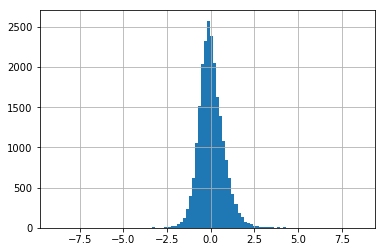

In [273]:
normalized_matrix[normalized_matrix.columns[0]].hist(bins=100)

# Histogram of First Gene

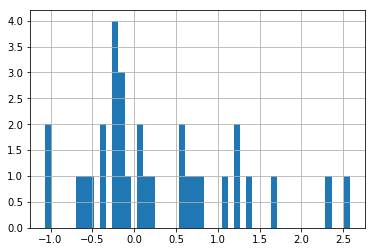

In [274]:
normalized_matrix.loc[normalized_matrix.index[0]].hist(bins=50)

# Save Filtered Matrix

In [275]:
filename = path+'aba_dev_rnaseq_age_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene List

In [276]:
gene_list = mf.createGeneList(normalized_matrix)

In [277]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1CF,29974
2,A2M,2
3,A2ML1,144568
4,A2ML1-AS1,1.00874e+08


In [278]:
gene_list.shape

(22411, 2)

# Save Gene List

In [279]:
filename = path+'aba_dev_rnaseq_age_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', compression='gzip')

# Create Attribute List

In [280]:
attribute_list = mf.createAttributeList(normalized_matrix)

In [281]:
attribute_list.head()

""
Attributes
1 yrs
10 mos
11 yrs
12 pcw
13 pcw


In [282]:
attribute_list.shape

(31, 0)

# Save Attribute List

In [283]:
filename = path+'aba_dev_rnaseq_age_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [284]:
standard_matrix = mf.createStandardizedMatrix(normalized_matrix)

In [285]:
standard_matrix.head()

,1 yrs,10 mos,11 yrs,12 pcw,13 pcw,13 yrs,15 yrs,16 pcw,17 pcw,18 yrs,...,35 pcw,36 yrs,37 pcw,37 yrs,4 mos,4 yrs,40 yrs,8 pcw,8 yrs,9 pcw
,,,,,,,,,,,,,,,,,,,,,
A1BG,0.194534,0.388083,-0.386111,-0.644175,-0.257078,0.000986,-0.450627,-0.837724,0.130018,0.581631,...,0.839696,-0.063530,0.775180,-0.579659,0.517115,0.968728,0.452599,-0.902240,0.323567,-0.966756
A1CF,0.194534,0.323567,-0.773208,0.000986,0.065502,-0.966756,-0.515143,0.517115,-0.063530,-0.837724,...,0.968728,-0.579659,0.904212,0.646147,0.259051,-0.128046,-0.257078,0.710663,0.839696,0.581631
A2M,0.522858,-0.315851,0.006729,-0.702948,-0.831980,0.200278,-0.057787,-0.573916,-0.896497,0.716407,...,-0.122303,0.329310,0.845439,0.264794,0.135761,-0.186819,-0.380368,-0.638432,-0.509400,-0.767464
A2ML1,-0.128046,-0.386111,-0.644175,-0.837724,-0.902240,0.646147,-0.063530,-0.708691,-0.192562,0.839696,...,0.452599,0.323567,0.388083,0.259051,0.581631,0.065502,-0.257078,-0.773208,0.130018,-0.966756
A2ML1-AS1,-0.644175,-0.128046,-0.063530,0.968728,0.710663,-0.321595,-0.579659,0.581631,0.775180,0.065502,...,0.904212,-0.386111,-0.192562,-0.515143,0.259051,-0.773208,-0.450627,0.323567,-0.708691,0.388083


# Plot of A Single Celltype, Normalized Value vs. Standardized Value

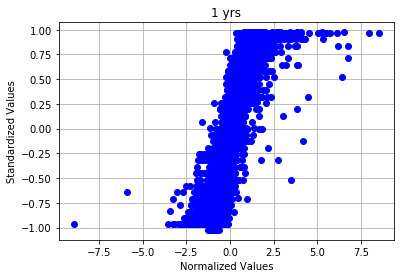

In [286]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [287]:
filename = path+'aba_dev_rnaseq_age_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [288]:
tertiary_matrix = mf.createTertiaryMatrix(standard_matrix)

In [289]:
tertiary_matrix.head()

,1 yrs,10 mos,11 yrs,12 pcw,13 pcw,13 yrs,15 yrs,16 pcw,17 pcw,18 yrs,...,35 pcw,36 yrs,37 pcw,37 yrs,4 mos,4 yrs,40 yrs,8 pcw,8 yrs,9 pcw
,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,-1
A1CF,0,0,0,0,0,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-1
A2ML1-AS1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Save Teriary Matrix

In [290]:
filename = path+'aba_dev_rnaseq_age_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Up Gene Set Library

In [291]:
name = 'aba_dev_rnaseq_age_gene_up_set'

In [292]:
mf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

In [293]:
name = 'aba_dev_rnaseq_age_gene_down_set'

In [294]:
mf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [295]:
name = 'aba_dev_rnaseq_age_attribute_up_set'

In [296]:
mf.createUpAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [297]:
name = 'aba_dev_rnaseq_age_attribute_down_set'

In [298]:
mf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Attribute Similarity Matrix

In [299]:
attribute_similarity_matix = mf.createSimilarityMatrix(normalized_matrix.T, 'cosine')

In [300]:
attribute_similarity_matix.head()

,1 yrs,10 mos,11 yrs,12 pcw,13 pcw,13 yrs,15 yrs,16 pcw,17 pcw,18 yrs,...,35 pcw,36 yrs,37 pcw,37 yrs,4 mos,4 yrs,40 yrs,8 pcw,8 yrs,9 pcw
,,,,,,,,,,,,,,,,,,,,,
1 yrs,1.000000,0.243690,0.385644,-0.180870,-0.256898,0.321596,0.486517,-0.137522,-0.153218,-0.099874,...,-0.102395,0.414583,0.008771,0.354934,0.354515,-0.014587,0.125131,-0.227201,0.268805,-0.169414
10 mos,0.243690,1.000000,0.278240,-0.107641,-0.097721,0.088000,0.174177,-0.166708,-0.068040,0.046169,...,0.043135,0.088563,-0.017435,0.064287,0.259043,0.273404,0.236846,-0.068905,0.327771,-0.139382
11 yrs,0.385644,0.278240,1.000000,-0.115025,-0.239116,0.233352,0.520573,-0.343115,-0.343797,-0.008812,...,-0.127867,0.311264,-0.207744,0.335770,0.157229,0.319411,0.436816,-0.136591,0.443436,-0.205644
12 pcw,-0.180870,-0.107641,-0.115025,1.000000,0.885149,-0.541057,-0.154920,0.658256,0.408968,-0.453764,...,-0.003446,-0.408169,-0.210909,-0.348678,-0.369679,-0.182560,-0.268307,0.514288,-0.245801,0.484871
13 pcw,-0.256898,-0.097721,-0.239116,0.885149,1.000000,-0.522645,-0.254268,0.705010,0.485365,-0.409889,...,0.033304,-0.422838,-0.183667,-0.400556,-0.406609,-0.218676,-0.317509,0.543662,-0.311037,0.565160


# Save Attribute Similarity Matrix

In [301]:
filename = path+'aba_dev_rnaseq_age_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

In [302]:
net.load_df(attribute_similarity_matix.iloc[:,:].copy())
# net.filter_N_top('row', rank_type='sum', N_top=300)
net.cluster()
net.widget()

# Create Gene Similarity Matrix

In [303]:
gene_similarity_matix = mf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [304]:
gene_similarity_matix.head()

,A1BG,A1CF,A2M,A2ML1,A2ML1-AS1,A2MP1,A3GALT2,A4GALT,A4GNT,AAAS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,0.280492,0.276342,0.312877,-0.186912,0.403848,0.366812,0.587955,0.086415,-0.085579,...,-0.461840,-0.177294,-0.652374,-0.643132,-0.534404,0.159834,-0.631109,0.159829,-0.605360,-0.770051
A1CF,0.280492,1.000000,-0.088866,-0.022756,0.233548,-0.170770,0.715128,0.125462,0.423917,0.317637,...,0.198488,0.418715,-0.116256,-0.059452,0.081584,0.773081,-0.309916,0.414664,-0.028621,-0.219995
A2M,0.276342,-0.088866,1.000000,0.676427,-0.498359,0.276165,-0.040291,0.703623,0.113973,-0.432248,...,-0.815963,-0.532631,-0.678467,-0.630121,-0.494807,-0.208108,-0.405992,-0.014155,-0.163989,-0.562955
A2ML1,0.312877,-0.022756,0.676427,1.000000,-0.106701,0.308032,0.107359,0.783952,0.062299,-0.153101,...,-0.695566,-0.163682,-0.507576,-0.756313,-0.254936,-0.077063,-0.693556,0.060896,-0.231101,-0.346503
A2ML1-AS1,-0.186912,0.233548,-0.498359,-0.106701,1.000000,-0.151850,0.376203,-0.128022,-0.113819,0.658217,...,0.598002,0.433013,0.576750,0.254362,0.699442,0.538329,-0.040744,0.485839,0.341765,0.528794


# Save Gene Similarity Matrix

In [305]:
filename = path+'aba_dev_rnaseq_age_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene-Attribute Edge List

In [306]:
name = 'aba_dev_rnaseq_age_gene_attribute_edge_list'

In [307]:
mf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, name)

Progeres: 100%  31 Out of 31   

 The number of statisticaly relevent gene-attribute associations is: 44822
